In [39]:
import xarray as xr
import xesmf as xe
import numpy as np
from tqdm import tqdm
from datetime import datetime

In [40]:
ESDC = xr.open_zarr("/net/data/DataCube/v2.1.1/esdc-8d-0.25deg-184x90x90-2.1.1.zarr")

In [41]:
ESDC

<xarray.Dataset>
Dimensions:                            (time: 1840, lat: 720, lon: 1440, bnds: 2)
Coordinates:
  * lat                                (lat) float64 89.88 89.62 ... -89.88
    lat_bnds                           (lat, bnds) float64 dask.array<chunksize=(720, 2), meta=np.ndarray>
  * lon                                (lon) float64 -179.9 -179.6 ... 179.9
    lon_bnds                           (lon, bnds) float64 dask.array<chunksize=(1440, 2), meta=np.ndarray>
  * time                               (time) datetime64[ns] 1979-01-05 ... 2...
    time_bnds                          (time, bnds) datetime64[ns] dask.array<chunksize=(1840, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables: (12/79)
    Rg                                 (time, lat, lon) float32 dask.array<chunksize=(184, 90, 90), meta=np.ndarray>
    aerosol_optical_thickness_1600     (time, lat, lon) float64 dask.array<chunksize=(184, 90, 90), meta=np.ndarray>
    aerosol_optical_thickness_550      (time, lat, lon) float64 dask.array<chunksize=(184, 90, 90), meta=np.ndarray>
    aerosol_optical_thickness_670      (time, lat, lon) float64 dask.array<chunksize=(184, 90, 90), meta=np.ndarray>
    aerosol_optical_thickness_870      (time, lat, lon) float64 dask.array<chunksize=(184, 90, 90), meta=np.ndarray>
    air_temperature_2m                 (time, lat, lon) float32 dask.array<chunksize=(184, 90, 90), meta=np.ndarray>
    ...                                 ...
    water_mask                         (time, lat, lon) float32 dask.array<chunksize=(184, 90, 90), meta=np.ndarray>
    water_vapour                       (time, lat, lon) float32 dask.array<chunksize=(184, 90, 90), meta=np.ndarray>
    white_sky_albedo                   (time, lat, lon) float32 dask.array<chunksize=(184, 90, 90), meta=np.ndarray>
    white_sky_albedo_avhrr             (time, lat, lon) float32 dask.array<chunksize=(184, 90, 90), meta=np.ndarray>
    xch4                               (time, lat, lon) float64 dask.array<chunksize=(184, 90, 90), meta=np.ndarray>
    xco2                               (time, lat, lon) float64 dask.array<chunksize=(184, 90, 90), meta=np.ndarray>
Attributes: (12/35)
    Metadata_conventions :     Unidata Dataset Discovery v1.0
    acknowledgment:            The ESDL team acknowledges all data providers! 
    chunking:                  1x720x1440
    comment:                   none. 
    contributor_name:          Max Planck Institute for Biogeochemistry
    contributor_role:          ESDL Science Lead 
    ...                        ...
    summary:                   This data set contains a data cube of Earth Sy...
    time_coverage_duration:    P40Y
    time_coverage_end:         31.12.2018
    time_coverage_resolution:  P8D
    time_coverage_start:       05.01.1979
    title:                     Earth System Data Cube

In [33]:
import xarray as xr
import xesmf as xe
import numpy as np
from tqdm import tqdm
from datetime import datetime

print("Reading")
dataset = xr.open_zarr("/net/scratch/dmontero/SIF/sif-rtsif-8d-0.25deg-256x128x128.zarr")

Reading


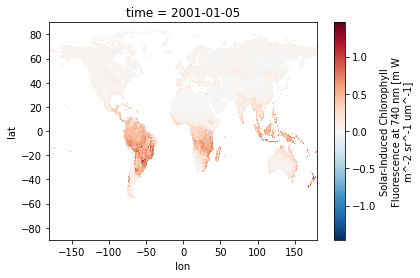

In [36]:
dataset.sif[0].plot()

In [31]:
print("Fixing time")
keep_attrs = dataset.time.attrs
dataset["time"] = dataset.time + np.timedelta64(4,"D")
dataset.time.attrs = keep_attrs

print("Rearranging coords")
dataset["lat"] = dataset.lat - 0.025
dataset["lon"] = dataset.lon + 0.025

In [ ]:
print("Coarsing")
dataset = dataset.coarsen(lat=5,lon=5).mean()
dataset = dataset.chunk(dict(time=256,lat=128,lon=128))

print("Adding attributes")
dataset.attrs['date_modified'] = str(datetime.now())
dataset.attrs['time_coverage_end'] = str(dataset.time[-1].values)
dataset.attrs['time_coverage_start'] = str(dataset.time[0].values)
dataset.attrs['reported_day'] = 5.0
dataset.attrs['processing_steps'] = dataset.attrs['processing_steps'] + ['Downsampling to 0.25 deg with mean']
dataset.attrs['id'] = "sif-rtsif-8d-0.25deg-256x128x128"

dataset.attrs['geospatial_lat_max'] = float(dataset.lat.max().values)
dataset.attrs['geospatial_lat_min'] = float(dataset.lat.min().values)
dataset.attrs['geospatial_lon_max'] = float(dataset.lon.max().values)
dataset.attrs['geospatial_lon_min'] = float(dataset.lon.min().values)

dataset.attrs['geospatial_lat_resolution'] = 0.25
dataset.attrs['geospatial_lon_resolution'] = 0.25

print("Saving")
dataset.to_zarr("/net/scratch/dmontero/SIF/sif-rtsif-8d-0.25deg-256x128x128.zarr")